In [1]:
import scanpy as sc
import scanpy.external as sce

import anndata
from pathlib import Path
from tqdm import tqdm
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from upsetplot import UpSet
from upsetplot import from_contents

In [3]:
from scipy import stats

In [4]:
import scipy.sparse as sp
import anndata as ad

In [5]:
import json

import dask.dataframe as dd
import numpy as np
import pandas as pd
#import relation_data_lake as rdl
import scanpy as sc
import scipy.sparse as sp
from anndata import AnnData
#from relation_data_lake.aws.aws_api import pull_folder

In [6]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400, figsize = [1.5*6.4, 1.5*4.8])
sns.set_style("whitegrid")

In [7]:
n_jobs = 50

sc._settings.ScanpyConfig(
    n_jobs=n_jobs
)


# Load data and create objects

In [8]:
adata = sc.read_h5ad('../Rd13_Data_post_filtering_cell_types-reseq.h5ad.gzip')

In [9]:
adata.obs.rename(columns={'batch':'chip_lane'}, inplace=True)
adata

AnnData object with n_obs × n_vars = 29208 × 5288
    obs: 'sgRNA', 'misc:umi_count', 'condition', 'chip_lane', 'target', 'misc::target_simple', 'is_nt', 'moi', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'rep', 'n_counts', 'leiden', 'cell_type', 'umap_density_condition'
    uns: 'condition_colors', 'umap_density_condition_params'
    obsm: 'X_pca', 'X_umap'

In [10]:
full_markers = list(['Pdgfra','Mgp','Cd248','Gpx3','Spon2','Acta2',
                     'Myl9','Tnc','Col1a1','Postn','Lox','Hbegf',
                     'Ccn2','Meox1','Pmepa1','Ccl2','Ccl7','Mt2',
                     'Cxcl1','Csf1','Vcan','Prl2c2','Igfbp4','Lamp1','Top2a'])

/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

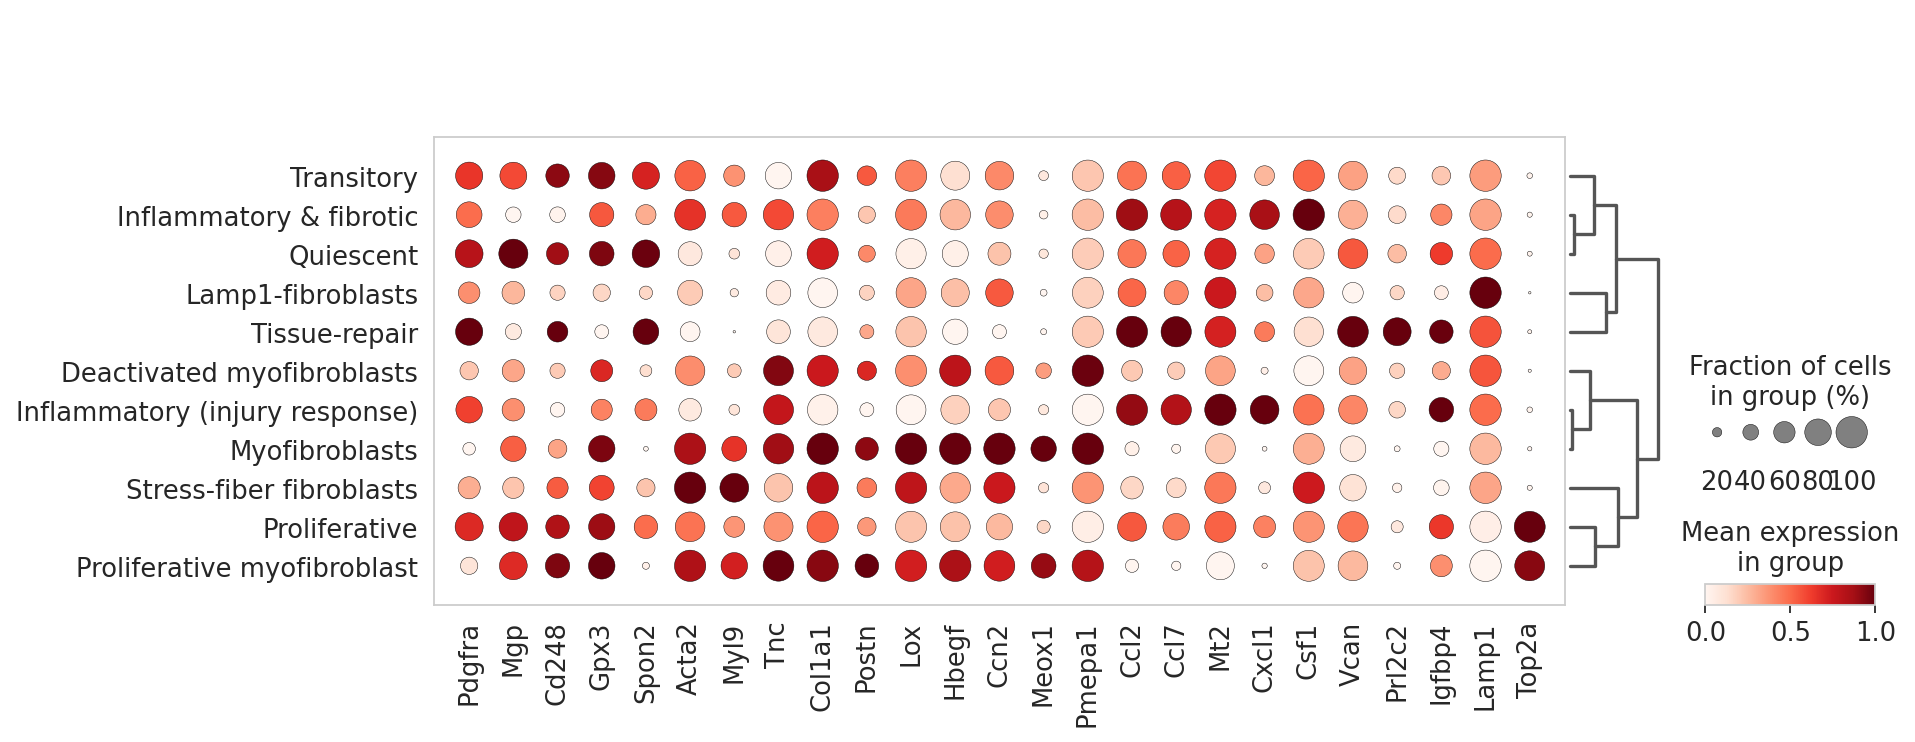

In [11]:
sc.pl.dotplot(adata = adata, var_names = full_markers, groupby = 'cell_type', 
              standard_scale = 'var', dendrogram=True, save = 'main_fig3e.svg')


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


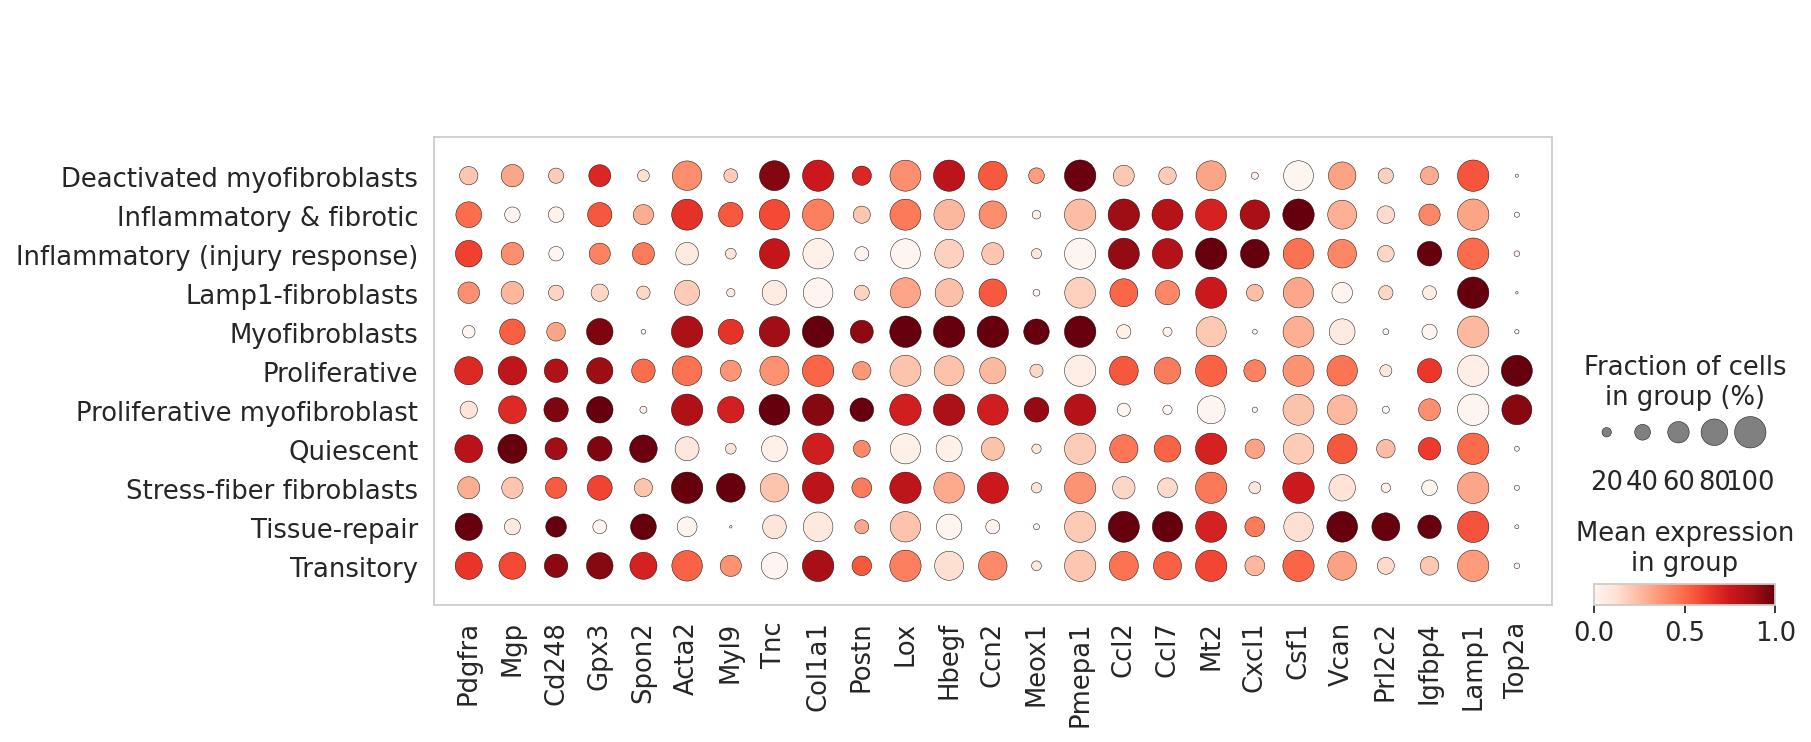

In [12]:
sc.pl.dotplot(adata = adata, var_names = full_markers, groupby = 'cell_type', 
              standard_scale = 'var', dendrogram=False, save = 'main_fig3e_nodendro.svg')


In [13]:
supp_markers = list(['Cxcl14','Clu','Cd34','Rnase4','Junb','Fos','Egr1','Ier2','Dbi','Ptn','Tpm1','Tpm2',
                     'Tpm4','Tagln','Palld','Pdlim1','Actn1','Tns1','Myl6','Myl12a','Nes','Itga5',
                     'Ccn4','Inhba','Tgfb1','Kdelr2','Ltbp2','Sparc','Col1a2','Col1a2','Col3a1','Col5a1',
                     'Col6a1','Ddah1','Cthrc1','Loxl2','Loxl3','Timp1','Serpinh1','Serpine1','Prss23','Vegfa',
                     'Piezo2','Jun','Runx1','Ncor2','Creb3l2','Egr2','Jund','Mt1','Spp1','Dcn','Odc1','Glrx',
                     'Lcn2','Cebpb','Cebpd','Ppic','Angptl4','Errfi1','Cd44','Nfkbia','S100a10','Cxcl16',
                     'Pfn1','Fn1','Tgfbr3','Crlf1','Prg4','Fgf7','Oaz1','Vcan','Pdpn','Prl2c3','Fth1','Nid1',
                     'Serpinb9b','Elob','Gng5','Apoe','Klf9','Ube2c','Tuba1b','Cks1b','H2afz',
                     'Selenoh'])


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


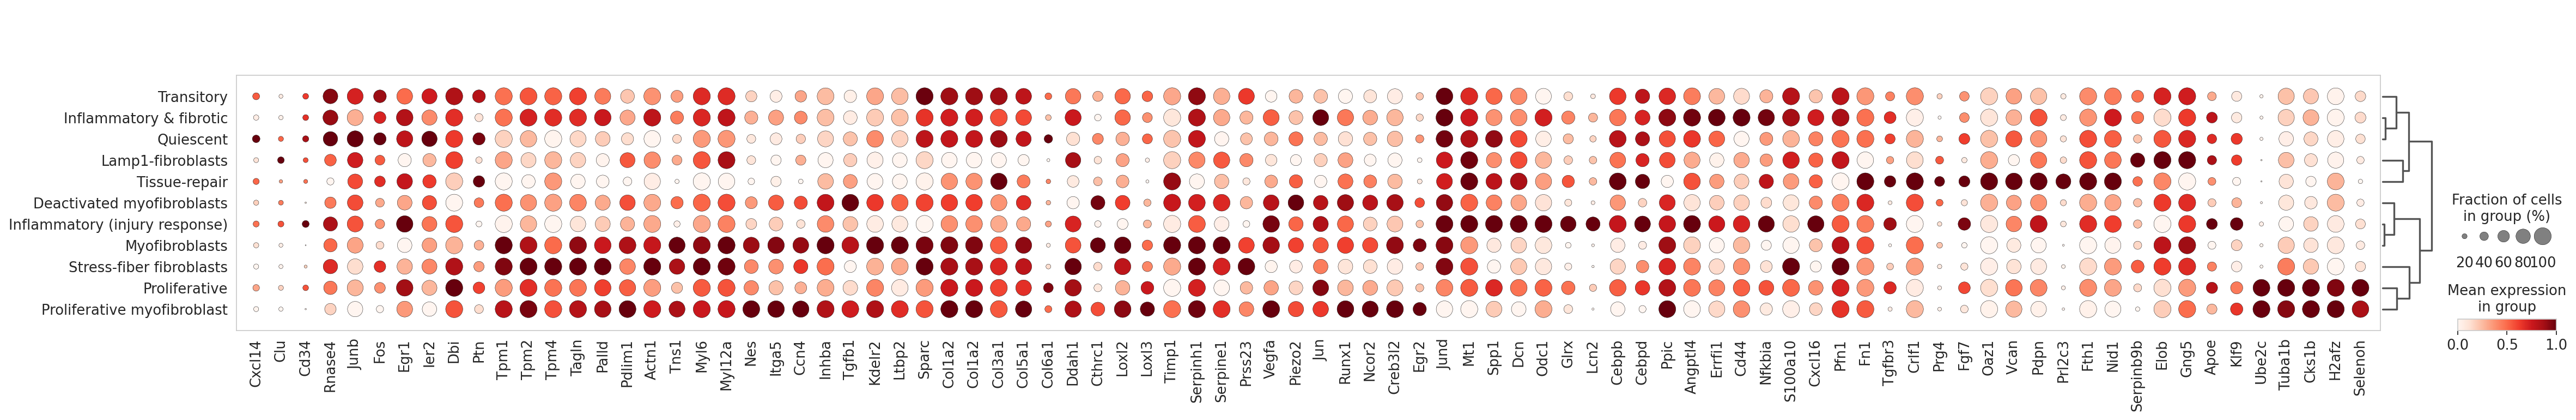

In [14]:
sc.pl.dotplot(adata = adata, var_names = supp_markers, groupby = 'cell_type', 
              standard_scale = 'var', dendrogram=True, save = 'supp_fig3e.svg')


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


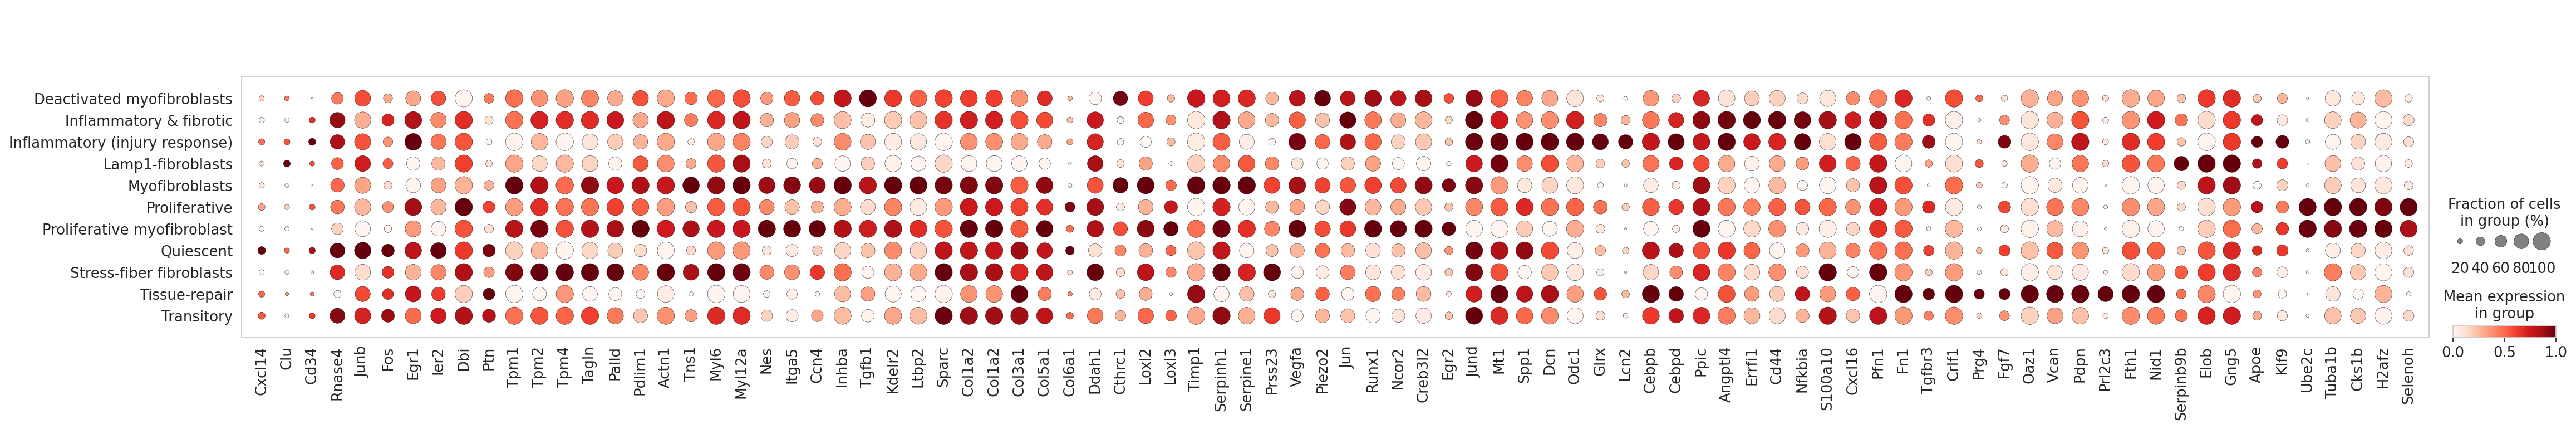

In [15]:
sc.pl.dotplot(adata = adata, var_names = supp_markers, groupby = 'cell_type', 
              standard_scale = 'var', dendrogram=False, save = 'supp_fig3e_nodendro.svg')
